In [0]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
# !pip install mpl_finance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
style.use('ggplot')


start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()

df = web.DataReader('005930.KS', 'yahoo',start,end)
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)

In [21]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,26800.0,26540.0,26800.0,26600.0,8774950.0,257.958313
2015-01-05,26720.0,26260.0,26720.0,26660.0,10139500.0,258.540161
2015-01-06,26340.0,25760.0,26300.0,25900.0,15235500.0,251.169937
2015-01-07,26220.0,25640.0,25880.0,26140.0,14322750.0,253.497406
2015-01-08,26780.0,26200.0,26780.0,26280.0,14477600.0,254.855087


In [22]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_ohlc.head()

,open,high,low,close
Date,,,,
2015-01-02,257.958313,258.540161,251.169937,254.855087
2015-01-12,255.242996,270.565308,255.242996,270.565308
2015-01-22,267.268097,271.535034,263.776917,264.746674
2015-02-01,265.328522,270.565308,263.389038,267.268097
2015-02-11,262.807129,267.074066,260.673676,267.074066


In [23]:
df_volume = df['Volume'].resample('10D').sum()
df_volume.head()

Date
2015-01-02    72262700.0
2015-01-12    99187100.0
2015-01-22    91570900.0
2015-02-01    55492600.0
2015-02-11    39216400.0
Freq: 10D, Name: Volume, dtype: float64

In [25]:
df_ohlc.reset_index(inplace=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,26800.0,26540.0,26800.0,26600.0,8774950.0,257.958313
2015-01-05,26720.0,26260.0,26720.0,26660.0,10139500.0,258.540161
2015-01-06,26340.0,25760.0,26300.0,25900.0,15235500.0,251.169937
2015-01-07,26220.0,25640.0,25880.0,26140.0,14322750.0,253.497406
2015-01-08,26780.0,26200.0,26780.0,26280.0,14477600.0,254.855087


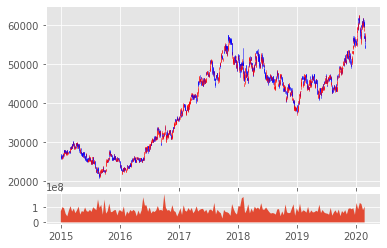

In [29]:
fig = plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
ax1.xaxis_date()
candlestick_ohlc(ax1,zip(mdates.date2num(df.index.to_pydatetime()),
                        df['Open'],df['High'],df['Low'],
                        df['Close']),width=0.5,colorup="r",colordown="b")
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)
plt.show()

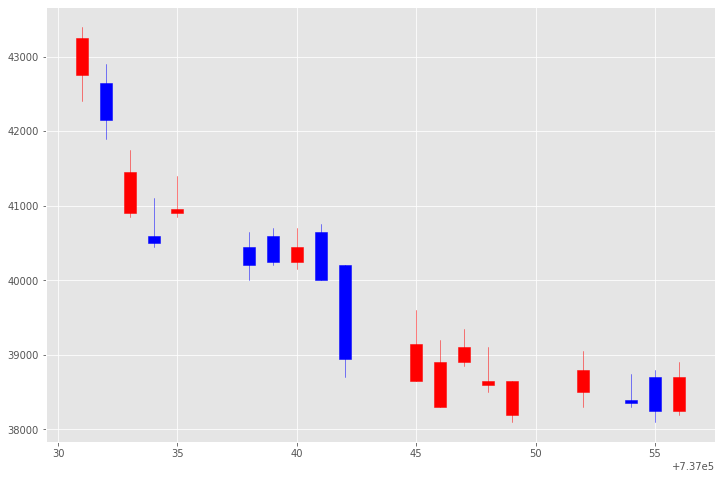

In [18]:
import datetime
start = datetime.datetime(2018, 12, 1)
end = datetime.datetime(2018, 12, 31)
# 코스닥은 "코드.KQ" 사용
samsung = web.DataReader("005930.KS", "yahoo", start, end)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# "from mpl_finance 의 candlestick_ohlc()" 입니다.
candlestick_ohlc(ax,zip(mdates.date2num(samsung.index.to_pydatetime()),
                        samsung['Open'],samsung['High'],samsung['Low'],
                        samsung['Close']),width=0.5,colorup="r",colordown="b")
plt.show()